If you are not using GitHub [click here to open the notebook using nbviewer](http://nbviewer.jupyter.org/github/biocore/emperor/blob/new-api/examples/keyboard.ipynb).

# Emperor's Python API

**This notebook demonstrate Emperor's new Python API, which can and will change as we continue to exercise this interface, for more information, have a look at the [pull request here](https://github.com/biocore/emperor/pull/405).**

In [24]:
%matplotlib inline

import pandas as pd, numpy as np
from skbio import OrdinationResults
import seaborn as sns

from emperor.flat_plots import plot_3x3
sns.set_style('white')

We are going to load data from [Yatsuneko et al. 2012](https://www.ncbi.nlm.nih.gov/pubmed/22699611) (the data was retrieved from study [850](https://qiita.ucsd.edu/study/description/850) in [Qiita](https://qiita.ucsd.edu), remember you need to be logged in to access the study).

Specifically, here we will reproduce *Figure 1C* while also displaying a larger number of principal coordinates as well as figure S4A.

Note: the results are similar but not the same, which could stem from a lower rarefaction depth used here (10,000 sequences per sample), additionally, the source OTU table for this notebook was created using closed reference OTU picking against Greengenes 13_8 at 97% similarity and no filtering was performed for low abundance OTUs. 

In [25]:
# n.b. there were 40 samp
res = OrdinationResults.read('yatsunenko/unweighted-unifrac.even10000.txt')

mf = pd.read_csv('yatsunenko/mapping-file.txt', sep='\t', dtype=object).set_index('#SampleID')
mf = mf.loc[res.samples.index]

We're going to create a color map for the individuals represented in the study. In this example, we're showing a discrete category.

In [26]:
categories = mf.country.unique()
colors = sns.color_palette(n_colors=len(categories))
colormap = {k: colors[i] for i, k in enumerate(categories)}

And plot!

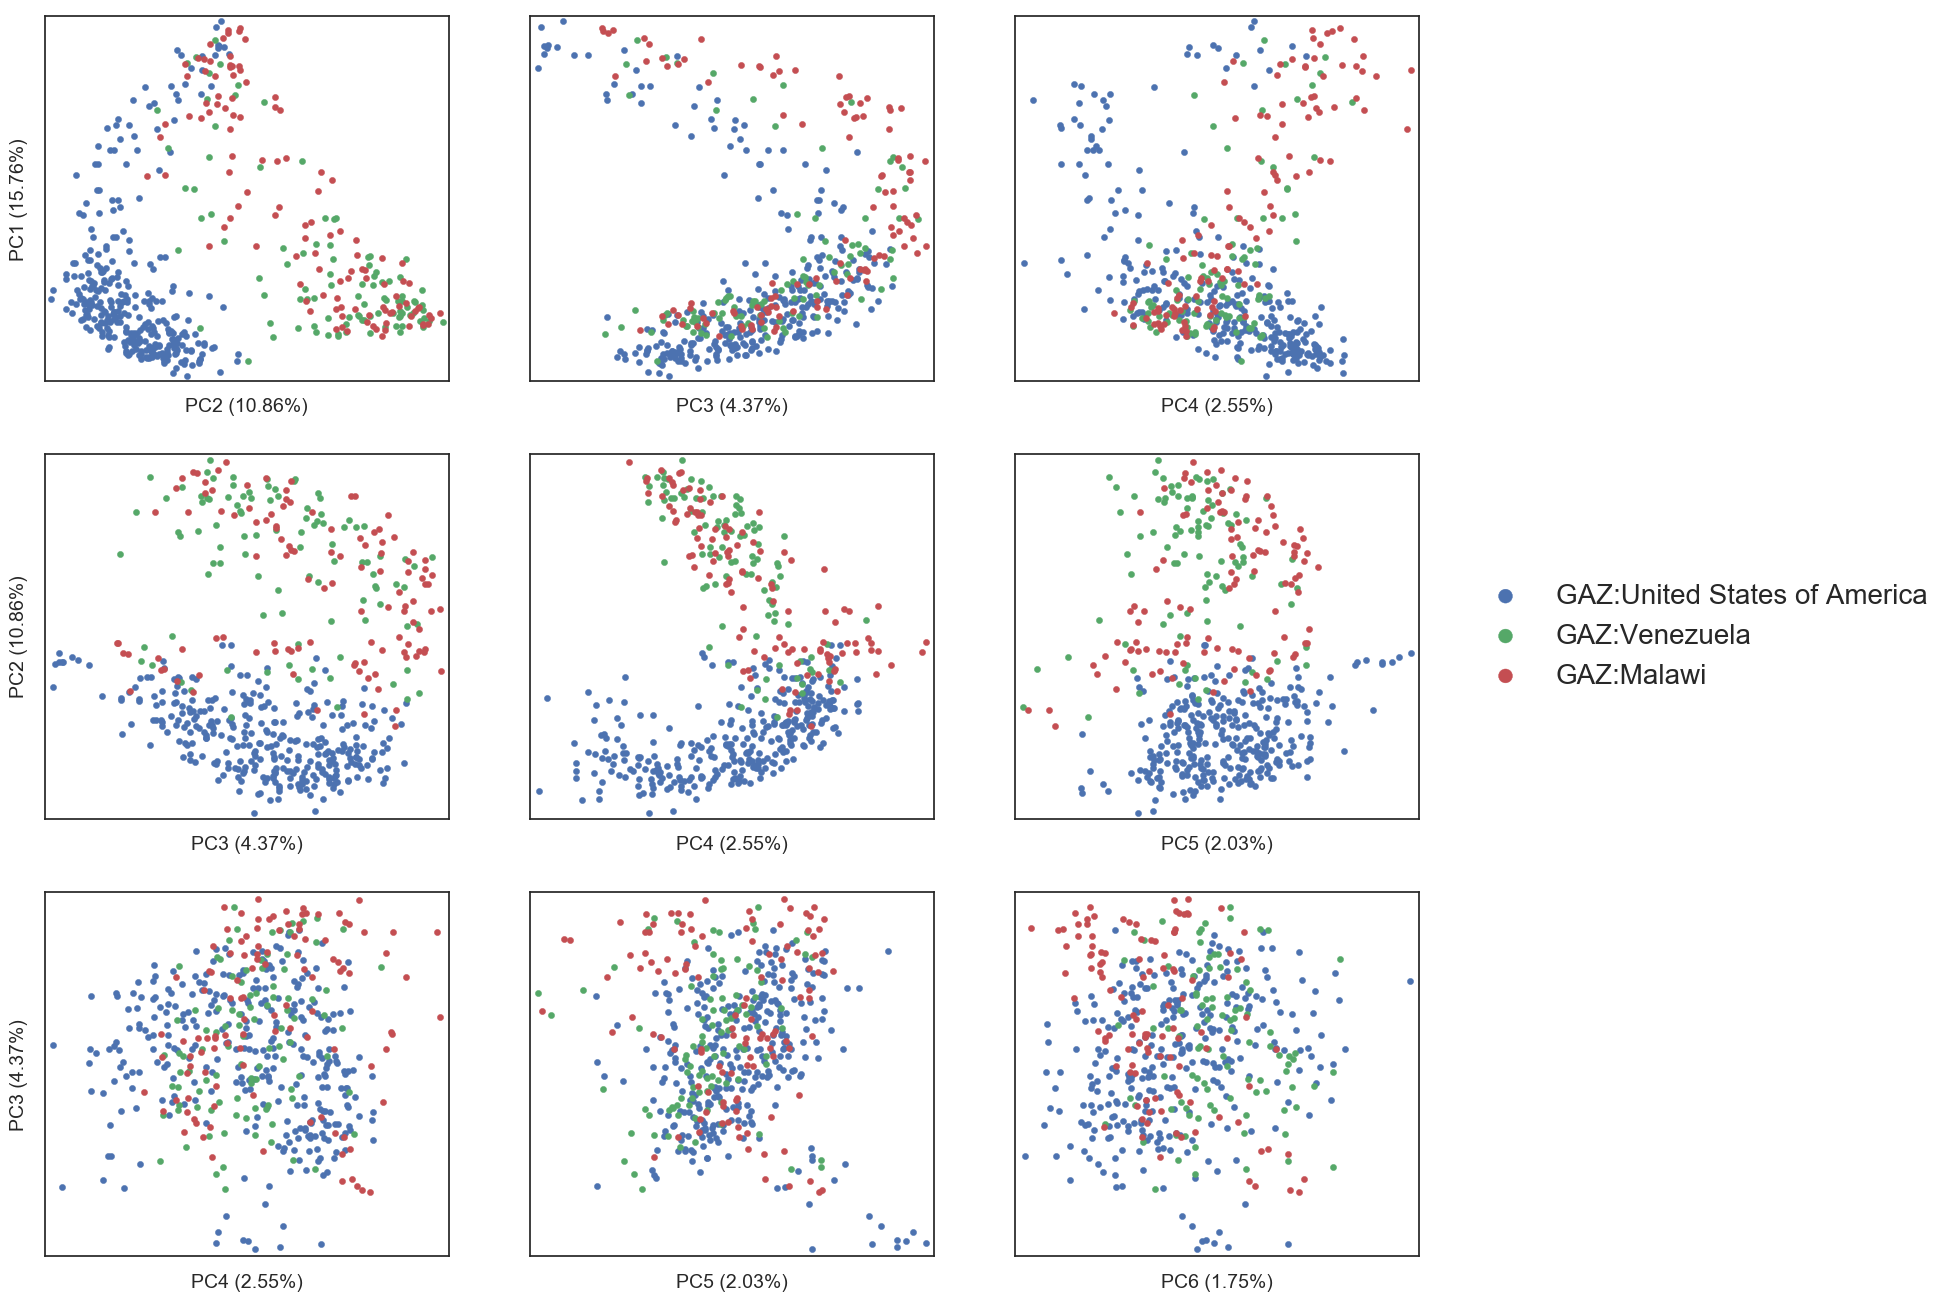

In [27]:
x = plot_3x3(res, 0, mf, 'country', colormap)

This plotting method also supports displaying gradients, and so we can use it to recreate the age trend in figure S2A.

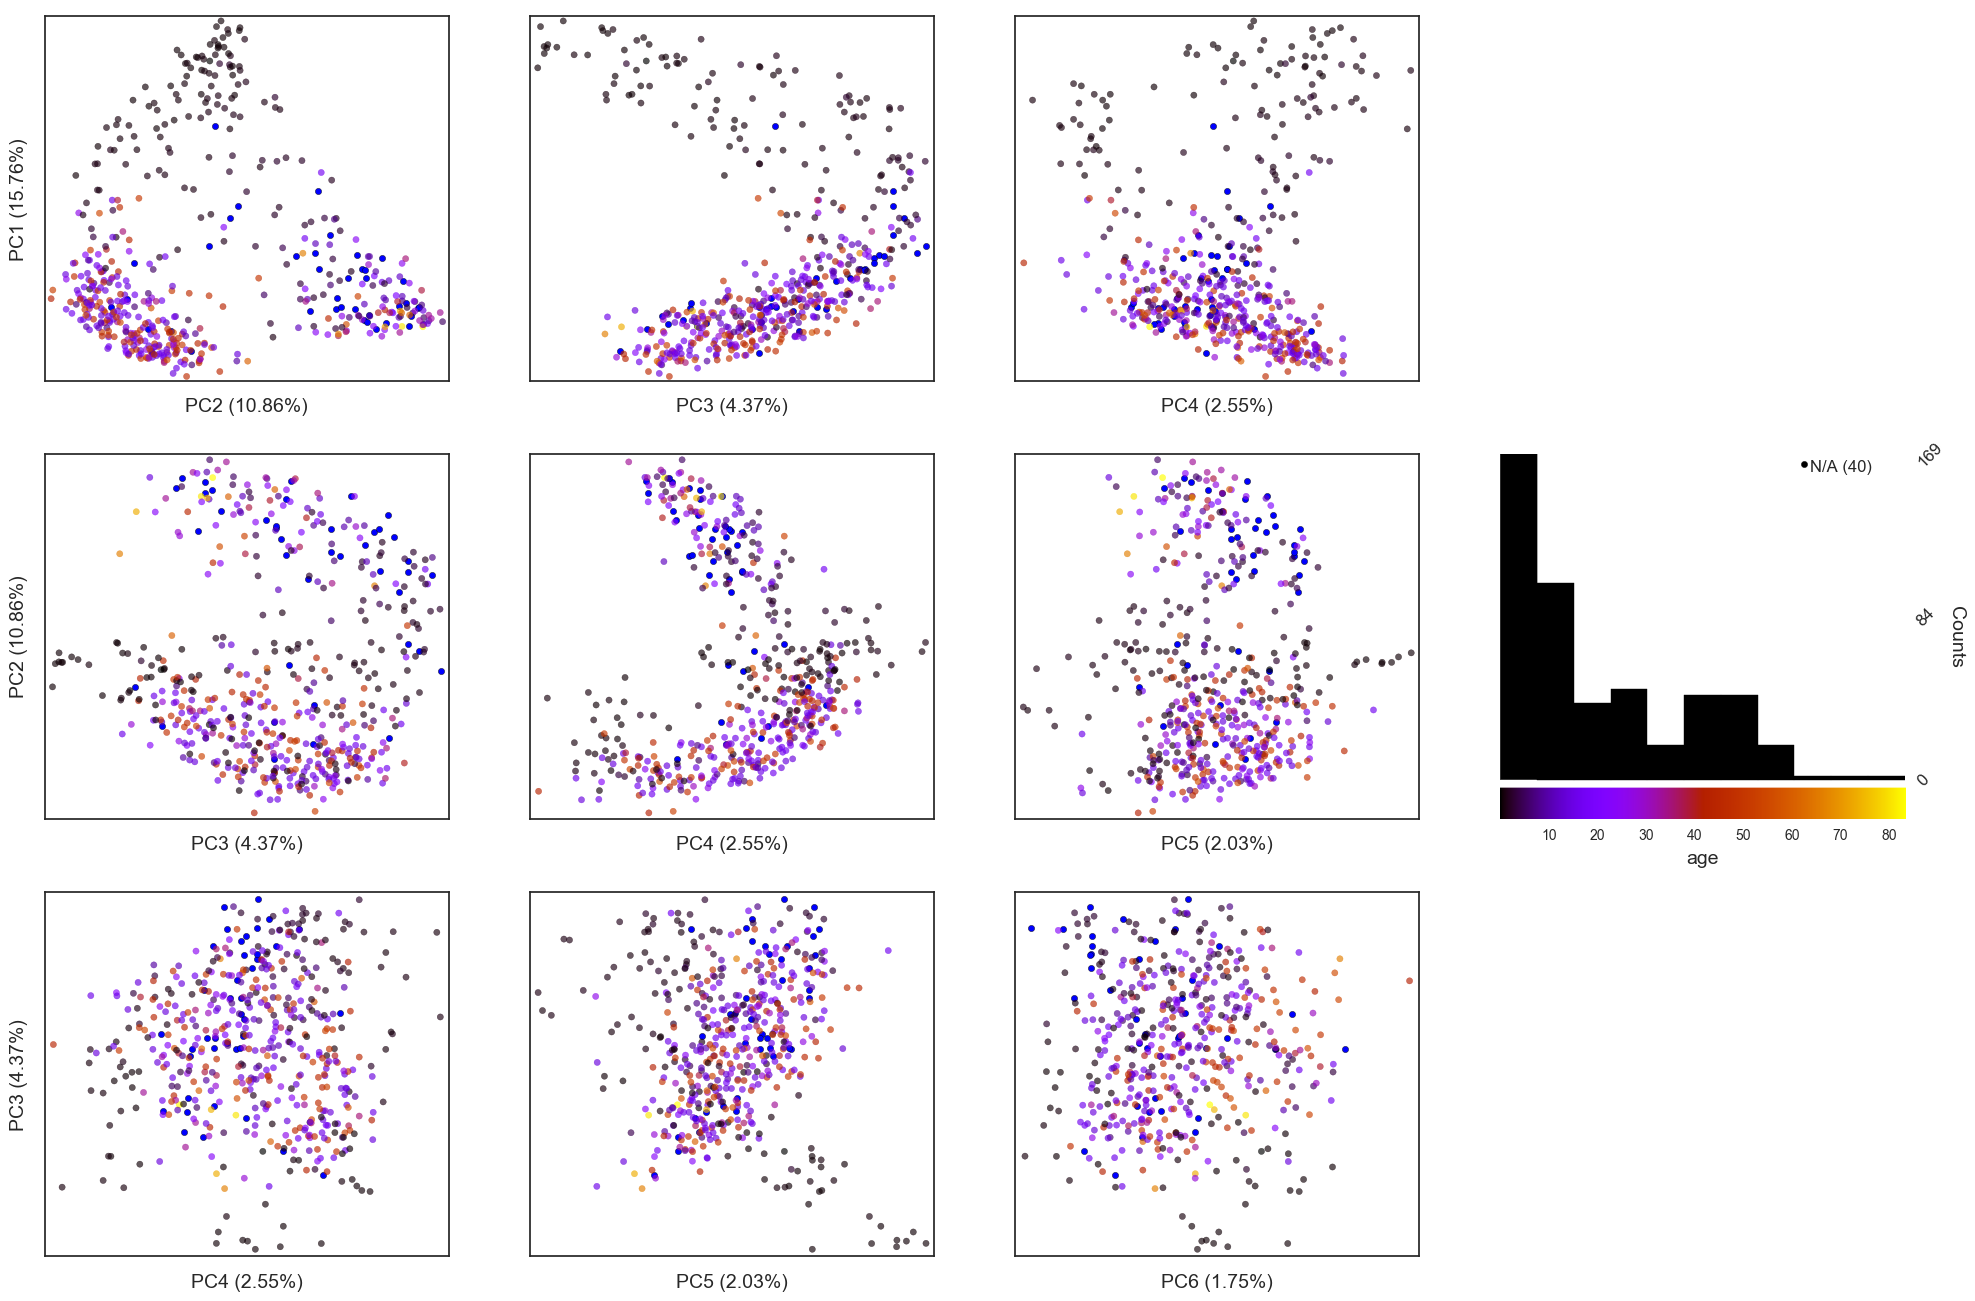

In [28]:
mf.age = mf.age.astype(float)
x = plot_3x3(res, 0, mf, 'age', 'gnuplot', focus_kw={'alpha': 0.65})